In [1]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary

In [2]:
config = easydict.EasyDict()
config.exp_name = "assemblenet_imagenet"
config.log_dir = os.path.join("experiments", config.exp_name, "logs/")
create_dirs([config.log_dir])
setup_logging(config.log_dir)

config.load_file = 'C:\\Users\\USER001\\Desktop\\pytorch-cifar100-master\\checkpoint\\resnet18\\resnet18-187-best.pth'
config.cuda = True
config.gpu_device = 0
config.seed = 1
config.learning_rate = 0.001
config.momentum = 0.9
config.milestones = [5, 10,15]
config.gamma = 0.9
config.weight_decay = 0.0005
config.img_size = 32
config.num_classes = 100
config.data_mode = "download"
config.data_loader_workers = 4
config.pin_memory = True
config.async_loading = True
config.batch_size = 128
config.async_loading = True
config.max_epoch = 100
torch.cuda.init()


agent = globals()["AssembleNetResNet"](config)
agent.init_graph(pretrained=False)
agent.load_checkpoint(file_path= config.load_file)
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))
# agent.validate()


agent.compress(method = 'greedy',k=0.49)
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

best,history = agent.train(specializing=False, freeze_conv=False)

[INFO]: Program will run on *****GPU-CUDA*****

[INFO]: __Python VERSION:  3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
[INFO]: __pyTorch VERSION:  1.6.0
[INFO]: __CUDA VERSION
[INFO]: Active CUDA Device: GPU 0
[INFO]: Available devices  1
[INFO]: Current cuda device  0
[INFO]: Loading DATA.....


Files already downloaded and verified
Loading checkpoint 'C:\Users\USER001\Desktop\pytorch-cifar100-master\checkpoint\resnet18\resnet18-187-best.pth'
Checkpoint loaded successfully

                                          Kernel Shape      Output Shape  \
Layer                                                                      
0_conv1                                  [3, 64, 3, 3]   [1, 64, 32, 32]   
1_bn1                                             [64]   [1, 64, 32, 32]   
2_relu                                               -   [1, 64, 32, 32]   
3_layer1.0.Conv2d_conv1                 [64, 64, 3, 3]   [1, 64, 32, 32]   
4_layer1.0.BatchNorm2d_bn1                        [64]   [1, 64, 32, 32]   
5_layer1.0.ReLU_relu                                 -   [1, 64, 32, 32]   
6_layer1.0.Conv2d_conv2                 [64, 64, 3, 3]   [1, 64, 32, 32]   
7_layer1.0.BatchNorm2d_bn2                        [64]   [1, 64, 32, 32]   
8_layer1.0.ReLU_relu                                 -   [

num_pruned 33
indices_pruned !!!  [7, 32, 46, 55, 54, 18, 16, 49, 62, 59, 27, 3, 29, 21, 38, 6, 8, 23, 19, 1, 35, 37, 26, 15, 34, 4, 13, 33, 39, 11, 56, 36, 45]
num_pruned 33
indices_pruned !!!  [11, 15, 36, 40, 49, 62, 44, 24, 46, 35, 20, 22, 27, 37, 30, 31, 56, 59, 53, 38, 26, 42, 14, 13, 33, 63, 55, 7, 19, 28, 32, 1, 47]
num_pruned 66
indices_pruned !!!  [102, 83, 106, 97, 109, 125, 68, 115, 84, 119, 55, 113, 40, 41, 111, 56, 73, 92, 18, 44, 53, 34, 126, 7, 36, 17, 70, 48, 22, 69, 104, 11, 1, 42, 103, 105, 26, 94, 79, 33, 61, 45, 122, 112, 10, 120, 57, 85, 62, 5, 63, 8, 100, 43, 64, 77, 117, 67, 23, 50, 38, 81, 93, 65, 71, 80]
num_pruned 66
indices_pruned !!!  [14, 102, 101, 126, 28, 65, 99, 29, 92, 55, 4, 85, 71, 111, 27, 36, 12, 11, 0, 60, 122, 104, 74, 76, 72, 90, 39, 56, 119, 112, 54, 16, 23, 26, 116, 33, 82, 41, 89, 47, 113, 30, 105, 13, 124, 52, 110, 50, 127, 115, 7, 1, 38, 42, 17, 34, 51, 87, 58, 25, 69, 19, 2, 117, 98, 63]
num_pruned 131
indices_pruned !!!  [16, 110, 172, 18

[INFO]:    [-] compress : 839.49628 sec, which is 13.99160 min, which is 0.23319 hour
Epoch-0-:   0%|                                                                                | 0/391 [00:00<?, ?it/s]

                                          Kernel Shape      Output Shape  \
Layer                                                                      
0_conv1                                  [3, 64, 3, 3]   [1, 64, 32, 32]   
1_bn1                                             [64]   [1, 64, 32, 32]   
2_relu                                               -   [1, 64, 32, 32]   
3_layer1.0.Conv2d_conv1                 [64, 31, 3, 3]   [1, 31, 32, 32]   
4_layer1.0.BatchNorm2d_bn1                        [31]   [1, 31, 32, 32]   
5_layer1.0.ReLU_relu                                 -   [1, 31, 32, 32]   
6_layer1.0.Conv2d_conv2                 [31, 64, 3, 3]   [1, 64, 32, 32]   
7_layer1.0.BatchNorm2d_bn2                        [64]   [1, 64, 32, 32]   
8_layer1.0.ReLU_relu                                 -   [1, 64, 32, 32]   
9_layer1.1.Conv2d_conv1                 [64, 31, 3, 3]   [1, 31, 32, 32]   
10_layer1.1.BatchNorm2d_bn1                       [31]   [1, 31, 32, 32]   
11_layer1.1.

Epoch-0-:   0%|▏                                                                       | 1/391 [00:05<36:25,  5.60s/it]

current learning rate:0.0


Epoch-0-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.27it/s]
[INFO]: Training at epoch-0 | loss: 1.2811533534313406	Top1 Acc: 0.655400000038147
Valiation at -0-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.16it/s]
[INFO]: Validation results at epoch-0 | loss: 2.5675171764591074	Top1 Acc: 0.4235
C:\Users\USER001\miniconda3\envs\pytorch16\lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|▏         

current learning rate:0.02


Epoch-1-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.30it/s]
[INFO]: Training at epoch-1 | loss: 1.3873671471615276	Top1 Acc: 0.6084400000190735
Valiation at -1-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.86it/s]
[INFO]: Validation results at epoch-1 | loss: 1.868114103999319	Top1 Acc: 0.5172
Epoch-2-:   1%|▌                                                                       | 3/391 [00:05<25:42,  3.98s/it]

current learning rate:0.04


Epoch-2-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.23it/s]
[INFO]: Training at epoch-2 | loss: 1.4015331106722508	Top1 Acc: 0.6026
Valiation at -2-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.73it/s]
[INFO]: Validation results at epoch-2 | loss: 2.330219012272509	Top1 Acc: 0.4715
Epoch-3-:   0%|▏                                                                       | 1/391 [00:06<39:21,  6.05s/it]

current learning rate:0.060000000000000005


Epoch-3-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.08it/s]
[INFO]: Training at epoch-3 | loss: 1.3991267251236665	Top1 Acc: 0.6049599999809265
Valiation at -3-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.21it/s]
[INFO]: Validation results at epoch-3 | loss: 1.8568258858934235	Top1 Acc: 0.5158
Epoch-4-:   1%|▌                                                                       | 3/391 [00:06<27:47,  4.30s/it]

current learning rate:0.08


Epoch-4-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.94it/s]
[INFO]: Training at epoch-4 | loss: 1.4014777198167103	Top1 Acc: 0.60446
Valiation at -4-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.21it/s]
[INFO]: Validation results at epoch-4 | loss: 1.9054232020921344	Top1 Acc: 0.5125
Epoch-5-:   1%|▌                                                                       | 3/391 [00:06<27:30,  4.25s/it]

current learning rate:0.1


Epoch-5-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.90it/s]
[INFO]: Training at epoch-5 | loss: 1.3587712523577464	Top1 Acc: 0.6171399999809265
Valiation at -5-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.74it/s]
[INFO]: Validation results at epoch-5 | loss: 1.7930559387689904	Top1 Acc: 0.5364
Epoch-6-:   1%|▌                                                                       | 3/391 [00:05<26:16,  4.06s/it]

current learning rate:0.09997266286704631


Epoch-6-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.21it/s]
[INFO]: Training at epoch-6 | loss: 1.299542855271293	Top1 Acc: 0.629700000038147
Valiation at -6-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.24it/s]
[INFO]: Validation results at epoch-6 | loss: 1.593942621086217	Top1 Acc: 0.5761
Epoch-7-:   1%|▌                                                                       | 3/391 [00:05<25:11,  3.89s/it]

current learning rate:0.09989068136093873


Epoch-7-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.56it/s]
[INFO]: Training at epoch-7 | loss: 1.2623201297677082	Top1 Acc: 0.6406199999809266
Valiation at -7-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.97it/s]
[INFO]: Validation results at epoch-7 | loss: 1.6573911256428007	Top1 Acc: 0.5667
Epoch-8-:   1%|▌                                                                       | 3/391 [00:05<24:53,  3.85s/it]

current learning rate:0.09975414512725057


Epoch-8-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.48it/s]
[INFO]: Training at epoch-8 | loss: 1.2507282460437101	Top1 Acc: 0.6423
Valiation at -8-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.72it/s]
[INFO]: Validation results at epoch-8 | loss: 1.7622947723050661	Top1 Acc: 0.5558
Epoch-9-:   1%|▌                                                                       | 3/391 [00:05<25:26,  3.93s/it]

current learning rate:0.09956320346634877


Epoch-9-: 100%|██████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.41it/s]
[INFO]: Training at epoch-9 | loss: 1.2244948953618784	Top1 Acc: 0.650680000038147
Valiation at -9-: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.69it/s]
[INFO]: Validation results at epoch-9 | loss: 1.6926456040973905	Top1 Acc: 0.5578
Epoch-10-:   1%|▌                                                                      | 3/391 [00:06<27:11,  4.20s/it]

current learning rate:0.09931806517013612


Epoch-10-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.16it/s]
[INFO]: Training at epoch-10 | loss: 1.2309593102511238	Top1 Acc: 0.647920000038147
Valiation at -10-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.68it/s]
[INFO]: Validation results at epoch-10 | loss: 1.5431090683876714	Top1 Acc: 0.585
Epoch-11-:   1%|▌                                                                      | 3/391 [00:06<27:34,  4.26s/it]

current learning rate:0.09901899829374047


Epoch-11-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.68it/s]
[INFO]: Training at epoch-11 | loss: 1.2057931603068281	Top1 Acc: 0.6543800000190735
Valiation at -11-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.08it/s]
[INFO]: Validation results at epoch-11 | loss: 1.600418105910096	Top1 Acc: 0.572
Epoch-12-:   0%|▏                                                                      | 1/391 [00:05<37:11,  5.72s/it]

current learning rate:0.0986663298624003


Epoch-12-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.32it/s]
[INFO]: Training at epoch-12 | loss: 1.2093786578958907	Top1 Acc: 0.65134
Valiation at -12-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.28it/s]
[INFO]: Validation results at epoch-12 | loss: 1.5853343945515306	Top1 Acc: 0.5783
Epoch-13-:   1%|▌                                                                      | 3/391 [00:05<25:30,  3.94s/it]

current learning rate:0.09826044551386744


Epoch-13-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.31it/s]
[INFO]: Training at epoch-13 | loss: 1.1916889519337803	Top1 Acc: 0.6559600000572204
Valiation at -13-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.30it/s]
[INFO]: Validation results at epoch-13 | loss: 1.7763992517809324	Top1 Acc: 0.5366
Epoch-14-:   0%|▏                                                                      | 1/391 [00:05<37:27,  5.76s/it]

current learning rate:0.09780178907671788


Epoch-14-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.44it/s]
[INFO]: Training at epoch-14 | loss: 1.1907894338488274	Top1 Acc: 0.66024
Valiation at -14-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.12it/s]
[INFO]: Validation results at epoch-14 | loss: 1.754840772363204	Top1 Acc: 0.5429
Epoch-15-:   1%|▌                                                                      | 3/391 [00:05<25:25,  3.93s/it]

current learning rate:0.09729086208503174


Epoch-15-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.52it/s]
[INFO]: Training at epoch-15 | loss: 1.1864543680644706	Top1 Acc: 0.65948
Valiation at -15-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.41it/s]
[INFO]: Validation results at epoch-15 | loss: 1.6920641343804854	Top1 Acc: 0.5583
Epoch-16-:   1%|▌                                                                      | 3/391 [00:06<27:09,  4.20s/it]

current learning rate:0.09672822322997304


Epoch-16-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.11it/s]
[INFO]: Training at epoch-16 | loss: 1.1788243953224338	Top1 Acc: 0.6613200000572205
Valiation at -16-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.58it/s]
[INFO]: Validation results at epoch-16 | loss: 1.660879464089116	Top1 Acc: 0.5661
Epoch-17-:   1%|▌                                                                      | 3/391 [00:06<27:24,  4.24s/it]

current learning rate:0.09611448774886924


Epoch-17-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.76it/s]
[INFO]: Training at epoch-17 | loss: 1.175504651215985	Top1 Acc: 0.66192
Valiation at -17-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.07it/s]
[INFO]: Validation results at epoch-17 | loss: 1.7489088924625251	Top1 Acc: 0.5584
Epoch-18-:   1%|▌                                                                      | 3/391 [00:05<24:56,  3.86s/it]

current learning rate:0.09545032675245813


Epoch-18-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.74it/s]
[INFO]: Training at epoch-18 | loss: 1.1610399071517807	Top1 Acc: 0.6670000000572205
Valiation at -18-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.34it/s]
[INFO]: Validation results at epoch-18 | loss: 1.8278743239897717	Top1 Acc: 0.5416
Epoch-19-:   1%|▌                                                                      | 3/391 [00:05<24:52,  3.85s/it]

current learning rate:0.09473646649103817


Epoch-19-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.73it/s]
[INFO]: Training at epoch-19 | loss: 1.1657273397421288	Top1 Acc: 0.6656200000572204
Valiation at -19-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.43it/s]
[INFO]: Validation results at epoch-19 | loss: 1.5876732717586468	Top1 Acc: 0.5752
Epoch-20-:   1%|▌                                                                      | 3/391 [00:05<25:12,  3.90s/it]

current learning rate:0.09397368756032445


Epoch-20-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.53it/s]
[INFO]: Training at epoch-20 | loss: 1.1479889564501964	Top1 Acc: 0.6686200000381469
Valiation at -20-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.97it/s]
[INFO]: Validation results at epoch-20 | loss: 1.664309414127205	Top1 Acc: 0.5697
Epoch-21-:   1%|▌                                                                      | 3/391 [00:05<25:39,  3.97s/it]

current learning rate:0.09316282404787869


Epoch-21-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.35it/s]
[INFO]: Training at epoch-21 | loss: 1.1485638642859886	Top1 Acc: 0.66736
Valiation at -21-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.43it/s]
[INFO]: Validation results at epoch-21 | loss: 1.6690726536738723	Top1 Acc: 0.5748
Epoch-22-:   1%|▌                                                                      | 3/391 [00:06<27:17,  4.22s/it]

current learning rate:0.09230476262104677


Epoch-22-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.16it/s]
[INFO]: Training at epoch-22 | loss: 1.1475792249755177	Top1 Acc: 0.6703599999809265
Valiation at -22-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.31it/s]
[INFO]: Validation results at epoch-22 | loss: 1.626623256297051	Top1 Acc: 0.5699
Epoch-23-:   1%|▌                                                                      | 3/391 [00:06<27:25,  4.24s/it]

current learning rate:0.09140044155740101


Epoch-23-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 15.03it/s]
[INFO]: Training at epoch-23 | loss: 1.1323221118553826	Top1 Acc: 0.671580000038147
Valiation at -23-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.93it/s]
[INFO]: Validation results at epoch-23 | loss: 1.5001900769487213	Top1 Acc: 0.6011
Epoch-24-:   1%|▌                                                                      | 3/391 [00:05<25:08,  3.89s/it]

current learning rate:0.09045084971874738


Epoch-24-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.58it/s]
[INFO]: Training at epoch-24 | loss: 1.1175000393177237	Top1 Acc: 0.67512
Valiation at -24-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.21it/s]
[INFO]: Validation results at epoch-24 | loss: 1.5296371752702738	Top1 Acc: 0.592
Epoch-25-:   1%|▌                                                                      | 3/391 [00:05<25:36,  3.96s/it]

current learning rate:0.08945702546981969


Epoch-25-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.28it/s]
[INFO]: Training at epoch-25 | loss: 1.1207590150406292	Top1 Acc: 0.6764600000572205
Valiation at -25-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.77it/s]
[INFO]: Validation results at epoch-25 | loss: 1.7043162433406975	Top1 Acc: 0.5563
Epoch-26-:   1%|▌                                                                      | 3/391 [00:05<25:37,  3.96s/it]

current learning rate:0.08842005554284296


Epoch-26-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.58it/s]
[INFO]: Training at epoch-26 | loss: 1.1137491091133078	Top1 Acc: 0.6756600000572205
Valiation at -26-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.59it/s]
[INFO]: Validation results at epoch-26 | loss: 1.6967825768869134	Top1 Acc: 0.5639
Epoch-27-:   1%|▌                                                                      | 3/391 [00:05<25:48,  3.99s/it]

current learning rate:0.0873410738492077


Epoch-27-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.42it/s]
[INFO]: Training at epoch-27 | loss: 1.0974487329992797	Top1 Acc: 0.6835200000572205
Valiation at -27-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.03it/s]
[INFO]: Validation results at epoch-27 | loss: 1.648058957691434	Top1 Acc: 0.5754
Epoch-28-:   1%|▌                                                                      | 3/391 [00:06<27:30,  4.25s/it]

current learning rate:0.08622126023955445


Epoch-28-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.61it/s]
[INFO]: Training at epoch-28 | loss: 1.0935875941115571	Top1 Acc: 0.683120000038147
Valiation at -28-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.24it/s]
[INFO]: Validation results at epoch-28 | loss: 1.536409989187989	Top1 Acc: 0.5926
Epoch-29-:   1%|▌                                                                      | 3/391 [00:06<28:22,  4.39s/it]

current learning rate:0.08506183921362444


Epoch-29-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.72it/s]
[INFO]: Training at epoch-29 | loss: 1.079958050147347	Top1 Acc: 0.686900000038147
Valiation at -29-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.58it/s]
[INFO]: Validation results at epoch-29 | loss: 1.468158388439613	Top1 Acc: 0.6069
Epoch-30-:   1%|▌                                                                      | 3/391 [00:06<29:28,  4.56s/it]

current learning rate:0.08386407858128707


Epoch-30-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.72it/s]
[INFO]: Training at epoch-30 | loss: 1.0741597717375402	Top1 Acc: 0.6894000000190735
Valiation at -30-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:06<00:00, 12.83it/s]
[INFO]: Validation results at epoch-30 | loss: 1.5450639015511622	Top1 Acc: 0.589
Epoch-31-:   1%|▌                                                                      | 3/391 [00:05<25:43,  3.98s/it]

current learning rate:0.08262928807620844


Epoch-31-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.53it/s]
[INFO]: Training at epoch-31 | loss: 1.06926340078149	Top1 Acc: 0.6874599999809266
Valiation at -31-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.49it/s]
[INFO]: Validation results at epoch-31 | loss: 1.5210685579082635	Top1 Acc: 0.6002
Epoch-32-:   1%|▌                                                                      | 3/391 [00:05<24:53,  3.85s/it]

current learning rate:0.08135881792367686


Epoch-32-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.66it/s]
[INFO]: Training at epoch-32 | loss: 1.0555624283488145	Top1 Acc: 0.691360000038147
Valiation at -32-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.50it/s]
[INFO]: Validation results at epoch-32 | loss: 1.485068150713474	Top1 Acc: 0.6138
Epoch-33-:   1%|▌                                                                      | 3/391 [00:06<27:47,  4.30s/it]

current learning rate:0.08005405736415126


Epoch-33-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 15.01it/s]
[INFO]: Training at epoch-33 | loss: 1.0355706499970478	Top1 Acc: 0.6984799999809265
Valiation at -33-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.08it/s]
[INFO]: Validation results at epoch-33 | loss: 1.5748856912685345	Top1 Acc: 0.5934
Epoch-34-:   1%|▌                                                                      | 3/391 [00:06<27:31,  4.26s/it]

current learning rate:0.07871643313414718


Epoch-34-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.59it/s]
[INFO]: Training at epoch-34 | loss: 1.0369383133280918	Top1 Acc: 0.6965
Valiation at -34-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.13it/s]
[INFO]: Validation results at epoch-34 | loss: 1.4328829246231272	Top1 Acc: 0.6237
Epoch-35-:   1%|▌                                                                      | 3/391 [00:06<30:44,  4.75s/it]

current learning rate:0.07734740790612135


Epoch-35-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.47it/s]
[INFO]: Training at epoch-35 | loss: 1.0147485161376426	Top1 Acc: 0.703020000038147
Valiation at -35-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.66it/s]
[INFO]: Validation results at epoch-35 | loss: 1.546969715552994	Top1 Acc: 0.5969
Epoch-36-:   1%|▌                                                                      | 3/391 [00:05<24:54,  3.85s/it]

current learning rate:0.07594847868906077


Epoch-36-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.62it/s]
[INFO]: Training at epoch-36 | loss: 1.015226152699317	Top1 Acc: 0.702520000038147
Valiation at -36-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.09it/s]
[INFO]: Validation results at epoch-36 | loss: 1.6272510569306868	Top1 Acc: 0.583
Epoch-37-:   1%|▌                                                                      | 3/391 [00:05<25:21,  3.92s/it]

current learning rate:0.0745211751915254


Epoch-37-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.59it/s]
[INFO]: Training at epoch-37 | loss: 0.9988680567277972	Top1 Acc: 0.70808
Valiation at -37-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.12it/s]
[INFO]: Validation results at epoch-37 | loss: 1.4557338575773602	Top1 Acc: 0.6128
Epoch-38-:   1%|▌                                                                      | 3/391 [00:05<25:12,  3.90s/it]

current learning rate:0.0730670581489344


Epoch-38-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.68it/s]
[INFO]: Training at epoch-38 | loss: 0.9934128330796576	Top1 Acc: 0.70898
Valiation at -38-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.31it/s]
[INFO]: Validation results at epoch-38 | loss: 1.6285244030288504	Top1 Acc: 0.5797
Epoch-39-:   1%|▌                                                                      | 3/391 [00:05<24:59,  3.86s/it]

current learning rate:0.07158771761692465


Epoch-39-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.17it/s]
[INFO]: Training at epoch-39 | loss: 0.9738479442608631	Top1 Acc: 0.713180000038147
Valiation at -39-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.85it/s]
[INFO]: Validation results at epoch-39 | loss: 1.6286416099041323	Top1 Acc: 0.5819
Epoch-40-:   1%|▌                                                                      | 3/391 [00:06<27:01,  4.18s/it]

current learning rate:0.07008477123264849


Epoch-40-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.14it/s]
[INFO]: Training at epoch-40 | loss: 0.9728755005790145	Top1 Acc: 0.7132800000572205
Valiation at -40-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.36it/s]
[INFO]: Validation results at epoch-40 | loss: 1.4567353619804866	Top1 Acc: 0.6224
Epoch-41-:   0%|▏                                                                      | 1/391 [00:06<39:52,  6.14s/it]

current learning rate:0.06855986244591104


Epoch-41-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.79it/s]
[INFO]: Training at epoch-41 | loss: 0.9483052999772075	Top1 Acc: 0.7184400000572204
Valiation at -41-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.99it/s]
[INFO]: Validation results at epoch-41 | loss: 1.3593362252923507	Top1 Acc: 0.6369
Epoch-42-:   1%|▌                                                                      | 3/391 [00:05<25:04,  3.88s/it]

current learning rate:0.06701465872208216


Epoch-42-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.49it/s]
[INFO]: Training at epoch-42 | loss: 0.9354122997549794	Top1 Acc: 0.723560000038147
Valiation at -42-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.33it/s]
[INFO]: Validation results at epoch-42 | loss: 1.374168249625194	Top1 Acc: 0.6359
Epoch-43-:   1%|▌                                                                      | 3/391 [00:05<25:48,  3.99s/it]

current learning rate:0.06545084971874737


Epoch-43-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.39it/s]
[INFO]: Training at epoch-43 | loss: 0.9204208995680065	Top1 Acc: 0.7274600000190735
Valiation at -43-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.02it/s]
[INFO]: Validation results at epoch-43 | loss: 1.5166103477719464	Top1 Acc: 0.6076
Epoch-44-:   1%|▌                                                                      | 3/391 [00:05<25:28,  3.94s/it]

current learning rate:0.06387014543809225


Epoch-44-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.10it/s]
[INFO]: Training at epoch-44 | loss: 0.9165062207700042	Top1 Acc: 0.72918
Valiation at -44-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.04it/s]
[INFO]: Validation results at epoch-44 | loss: 1.3118294153032424	Top1 Acc: 0.6476
Epoch-45-:   1%|▌                                                                      | 3/391 [00:05<25:23,  3.93s/it]

current learning rate:0.062274274357039965


Epoch-45-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.43it/s]
[INFO]: Training at epoch-45 | loss: 0.888670981387653	Top1 Acc: 0.73646
Valiation at -45-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.12it/s]
[INFO]: Validation results at epoch-45 | loss: 1.4942985818355898	Top1 Acc: 0.6143
Epoch-46-:   1%|▌                                                                      | 3/391 [00:06<27:10,  4.20s/it]

current learning rate:0.06066498153718736


Epoch-46-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.98it/s]
[INFO]: Training at epoch-46 | loss: 0.8835785734988845	Top1 Acc: 0.736940000038147
Valiation at -46-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.59it/s]
[INFO]: Validation results at epoch-46 | loss: 1.3609766801701317	Top1 Acc: 0.6388
Epoch-47-:   1%|▌                                                                      | 3/391 [00:06<27:27,  4.25s/it]

current learning rate:0.0590440267166055


Epoch-47-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.75it/s]
[INFO]: Training at epoch-47 | loss: 0.8536920135893176	Top1 Acc: 0.7459599999809265
Valiation at -47-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.40it/s]
[INFO]: Validation results at epoch-47 | loss: 1.6722721993168699	Top1 Acc: 0.5881
Epoch-48-:   1%|▌                                                                      | 3/391 [00:05<25:04,  3.88s/it]

current learning rate:0.0574131823855921


Epoch-48-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.51it/s]
[INFO]: Training at epoch-48 | loss: 0.846781453360682	Top1 Acc: 0.7461800000572204
Valiation at -48-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.24it/s]
[INFO]: Validation results at epoch-48 | loss: 1.4980711031563674	Top1 Acc: 0.6044
Epoch-49-:   1%|▌                                                                      | 3/391 [00:05<25:56,  4.01s/it]

current learning rate:0.05577423184847931


Epoch-49-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.30it/s]
[INFO]: Training at epoch-49 | loss: 0.8289139978111247	Top1 Acc: 0.7529000000572205
Valiation at -49-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.31it/s]
[INFO]: Validation results at epoch-49 | loss: 1.4302426719967323	Top1 Acc: 0.6307
Epoch-50-:   1%|▌                                                                      | 3/391 [00:05<25:04,  3.88s/it]

current learning rate:0.05412896727361663


Epoch-50-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.51it/s]
[INFO]: Training at epoch-50 | loss: 0.815818625795262	Top1 Acc: 0.7559200000572205
Valiation at -50-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.80it/s]
[INFO]: Validation results at epoch-50 | loss: 1.4428494384017172	Top1 Acc: 0.6216
Epoch-51-:   1%|▌                                                                      | 3/391 [00:05<25:55,  4.01s/it]

current learning rate:0.052479187733661115


Epoch-51-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.25it/s]
[INFO]: Training at epoch-51 | loss: 0.7874534292446683	Top1 Acc: 0.763340000038147
Valiation at -51-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.55it/s]
[INFO]: Validation results at epoch-51 | loss: 1.5099259992189045	Top1 Acc: 0.6201
Epoch-52-:   1%|▌                                                                      | 3/391 [00:06<28:37,  4.43s/it]

current learning rate:0.05082669723831793


Epoch-52-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.77it/s]
[INFO]: Training at epoch-52 | loss: 0.7735323903658201	Top1 Acc: 0.7668400000190735
Valiation at -52-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.50it/s]
[INFO]: Validation results at epoch-52 | loss: 1.331728592703614	Top1 Acc: 0.6524
Epoch-53-:   1%|▌                                                                      | 3/391 [00:06<27:54,  4.32s/it]

current learning rate:0.04917330276168208


Epoch-53-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.67it/s]
[INFO]: Training at epoch-53 | loss: 0.7576846063441938	Top1 Acc: 0.7716399999809265
Valiation at -53-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.43it/s]
[INFO]: Validation results at epoch-53 | loss: 1.3878188427490523	Top1 Acc: 0.6412
Epoch-54-:   1%|▌                                                                      | 3/391 [00:05<24:59,  3.86s/it]

current learning rate:0.04752081226633889


Epoch-54-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.75it/s]
[INFO]: Training at epoch-54 | loss: 0.7373374064865015	Top1 Acc: 0.77862
Valiation at -54-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.56it/s]
[INFO]: Validation results at epoch-54 | loss: 1.373257171504105	Top1 Acc: 0.6386
Epoch-55-:   1%|▌                                                                      | 3/391 [00:05<24:58,  3.86s/it]

current learning rate:0.04587103272638339


Epoch-55-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.72it/s]
[INFO]: Training at epoch-55 | loss: 0.7077942996683633	Top1 Acc: 0.7857799999809265
Valiation at -55-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.54it/s]
[INFO]: Validation results at epoch-55 | loss: 1.323426976234098	Top1 Acc: 0.6513
Epoch-56-:   1%|▌                                                                      | 3/391 [00:05<25:01,  3.87s/it]

current learning rate:0.04422576815152071


Epoch-56-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.72it/s]
[INFO]: Training at epoch-56 | loss: 0.6870428045539905	Top1 Acc: 0.7919000000190735
Valiation at -56-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.31it/s]
[INFO]: Validation results at epoch-56 | loss: 1.389708571796176	Top1 Acc: 0.6378
Epoch-57-:   1%|▌                                                                      | 3/391 [00:05<25:15,  3.91s/it]

current learning rate:0.04258681761440791


Epoch-57-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.56it/s]
[INFO]: Training at epoch-57 | loss: 0.6690861046161798	Top1 Acc: 0.7965799999809265
Valiation at -57-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.01it/s]
[INFO]: Validation results at epoch-57 | loss: 1.334529680541799	Top1 Acc: 0.6532
Epoch-58-:   1%|▌                                                                      | 3/391 [00:06<27:08,  4.20s/it]

current learning rate:0.04095597328339452


Epoch-58-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.22it/s]
[INFO]: Training at epoch-58 | loss: 0.6594619007061815	Top1 Acc: 0.7977800000190735
Valiation at -58-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.89it/s]
[INFO]: Validation results at epoch-58 | loss: 1.3495798495751392	Top1 Acc: 0.6498
Epoch-59-:   1%|▌                                                                      | 3/391 [00:06<27:12,  4.21s/it]

current learning rate:0.03933501846281267


Epoch-59-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.96it/s]
[INFO]: Training at epoch-59 | loss: 0.633028703653599	Top1 Acc: 0.8076999999809266
Valiation at -59-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.85it/s]
[INFO]: Validation results at epoch-59 | loss: 1.2549074993857854	Top1 Acc: 0.6736
Epoch-60-:   1%|▌                                                                      | 3/391 [00:05<25:06,  3.88s/it]

current learning rate:0.03772572564296005


Epoch-60-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.35it/s]
[INFO]: Training at epoch-60 | loss: 0.6088246652842177	Top1 Acc: 0.8145400000572205
Valiation at -60-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.09it/s]
[INFO]: Validation results at epoch-60 | loss: 1.288171215902401	Top1 Acc: 0.6736
Epoch-61-:   1%|▌                                                                      | 3/391 [00:05<25:18,  3.91s/it]

current learning rate:0.03612985456190777


Epoch-61-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.36it/s]
[INFO]: Training at epoch-61 | loss: 0.5786450708766118	Top1 Acc: 0.82206
Valiation at -61-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.45it/s]
[INFO]: Validation results at epoch-61 | loss: 1.2993910772890984	Top1 Acc: 0.6648
Epoch-62-:   1%|▌                                                                      | 3/391 [00:05<25:20,  3.92s/it]

current learning rate:0.034549150281252626


Epoch-62-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.63it/s]
[INFO]: Training at epoch-62 | loss: 0.5473233549033895	Top1 Acc: 0.8335
Valiation at -62-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.87it/s]
[INFO]: Validation results at epoch-62 | loss: 1.3834282620043694	Top1 Acc: 0.6498
Epoch-63-:   0%|▏                                                                      | 1/391 [00:05<36:14,  5.57s/it]

current learning rate:0.03298534127791786


Epoch-63-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.47it/s]
[INFO]: Training at epoch-63 | loss: 0.526478035065829	Top1 Acc: 0.83792
Valiation at -63-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.97it/s]
[INFO]: Validation results at epoch-63 | loss: 1.2814169722267343	Top1 Acc: 0.678
Epoch-64-:   1%|▌                                                                      | 3/391 [00:06<27:48,  4.30s/it]

current learning rate:0.03144013755408897


Epoch-64-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.05it/s]
[INFO]: Training at epoch-64 | loss: 0.5041490665177251	Top1 Acc: 0.8450600000572205
Valiation at -64-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.24it/s]
[INFO]: Validation results at epoch-64 | loss: 1.3266336125663565	Top1 Acc: 0.6714
Epoch-65-:   1%|▌                                                                      | 3/391 [00:06<27:40,  4.28s/it]

current learning rate:0.02991522876735153


Epoch-65-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.84it/s]
[INFO]: Training at epoch-65 | loss: 0.4828084183623419	Top1 Acc: 0.8505800000381469
Valiation at -65-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.88it/s]
[INFO]: Validation results at epoch-65 | loss: 1.317236732078504	Top1 Acc: 0.6713
Epoch-66-:   1%|▌                                                                      | 3/391 [00:05<25:12,  3.90s/it]

current learning rate:0.02841228238307534


Epoch-66-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.60it/s]
[INFO]: Training at epoch-66 | loss: 0.45997608390153216	Top1 Acc: 0.8574200000572204
Valiation at -66-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.25it/s]
[INFO]: Validation results at epoch-66 | loss: 1.2703124993964086	Top1 Acc: 0.6782
Epoch-67-:   1%|▌                                                                      | 3/391 [00:05<24:58,  3.86s/it]

current learning rate:0.02693294185106562


Epoch-67-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.62it/s]
[INFO]: Training at epoch-67 | loss: 0.4178345356603413	Top1 Acc: 0.8716000000572205
Valiation at -67-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.37it/s]
[INFO]: Validation results at epoch-67 | loss: 1.3049441621273379	Top1 Acc: 0.6783
Epoch-68-:   1%|▌                                                                      | 3/391 [00:05<25:57,  4.01s/it]

current learning rate:0.025478824808474593


Epoch-68-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.55it/s]
[INFO]: Training at epoch-68 | loss: 0.3981658341863271	Top1 Acc: 0.8763600000572205
Valiation at -68-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.32it/s]
[INFO]: Validation results at epoch-68 | loss: 1.2644196990170056	Top1 Acc: 0.6909
Epoch-69-:   0%|▏                                                                      | 1/391 [00:05<36:27,  5.61s/it]

current learning rate:0.02405152131093924


Epoch-69-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.50it/s]
[INFO]: Training at epoch-69 | loss: 0.37462388390622786	Top1 Acc: 0.88446
Valiation at -69-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.06it/s]
[INFO]: Validation results at epoch-69 | loss: 1.2315820274473745	Top1 Acc: 0.6902
Epoch-70-:   1%|▌                                                                      | 3/391 [00:06<27:24,  4.24s/it]

current learning rate:0.02265259209387865


Epoch-70-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.89it/s]
[INFO]: Training at epoch-70 | loss: 0.3431313666312591	Top1 Acc: 0.895080000038147
Valiation at -70-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.46it/s]
[INFO]: Validation results at epoch-70 | loss: 1.3223393242570418	Top1 Acc: 0.6826
Epoch-71-:   1%|▌                                                                      | 3/391 [00:06<28:18,  4.38s/it]

current learning rate:0.021283566865852824


Epoch-71-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.60it/s]
[INFO]: Training at epoch-71 | loss: 0.32764150602433384	Top1 Acc: 0.899600000038147
Valiation at -71-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.12it/s]
[INFO]: Validation results at epoch-71 | loss: 1.227327429795567	Top1 Acc: 0.6944
Epoch-72-:   1%|▌                                                                      | 3/391 [00:05<25:08,  3.89s/it]

current learning rate:0.019945942635848746


Epoch-72-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.41it/s]
[INFO]: Training at epoch-72 | loss: 0.2917441202094183	Top1 Acc: 0.9111400000572205
Valiation at -72-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.21it/s]
[INFO]: Validation results at epoch-72 | loss: 1.255602024778535	Top1 Acc: 0.6974
Epoch-73-:   0%|▏                                                                      | 1/391 [00:05<37:35,  5.78s/it]

current learning rate:0.01864118207632315


Epoch-73-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.77it/s]
[INFO]: Training at epoch-73 | loss: 0.2659932680980629	Top1 Acc: 0.918700000038147
Valiation at -73-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.05it/s]
[INFO]: Validation results at epoch-73 | loss: 1.2168584971488277	Top1 Acc: 0.7086
Epoch-74-:   1%|▌                                                                      | 3/391 [00:05<25:30,  3.95s/it]

current learning rate:0.017370711923791565


Epoch-74-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 15.66it/s]
[INFO]: Training at epoch-74 | loss: 0.24423948542007703	Top1 Acc: 0.9270000000572205
Valiation at -74-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.34it/s]
[INFO]: Validation results at epoch-74 | loss: 1.252872884273529	Top1 Acc: 0.6939
Epoch-75-:   1%|▌                                                                      | 3/391 [00:05<25:13,  3.90s/it]

current learning rate:0.016135921418712958


Epoch-75-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.60it/s]
[INFO]: Training at epoch-75 | loss: 0.21340065041695105	Top1 Acc: 0.9373200000572205
Valiation at -75-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.90it/s]
[INFO]: Validation results at epoch-75 | loss: 1.2268833510483368	Top1 Acc: 0.7085
Epoch-76-:   1%|▌                                                                      | 3/391 [00:06<27:02,  4.18s/it]

current learning rate:0.014938160786375571


Epoch-76-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.28it/s]
[INFO]: Training at epoch-76 | loss: 0.1881917729554579	Top1 Acc: 0.9450599999809265
Valiation at -76-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.89it/s]
[INFO]: Validation results at epoch-76 | loss: 1.2336864878859701	Top1 Acc: 0.7105
Epoch-77-:   1%|▌                                                                      | 3/391 [00:06<27:21,  4.23s/it]

current learning rate:0.013778739760445552


Epoch-77-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.08it/s]
[INFO]: Training at epoch-77 | loss: 0.17430299112711417	Top1 Acc: 0.9499799999809265
Valiation at -77-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.53it/s]
[INFO]: Validation results at epoch-77 | loss: 1.2287872577015357	Top1 Acc: 0.7091
Epoch-78-:   0%|▏                                                                      | 1/391 [00:05<36:56,  5.68s/it]

current learning rate:0.012658926150792305


Epoch-78-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.44it/s]
[INFO]: Training at epoch-78 | loss: 0.14806780217172544	Top1 Acc: 0.9589599999809265
Valiation at -78-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.45it/s]
[INFO]: Validation results at epoch-78 | loss: 1.1724394469321529	Top1 Acc: 0.7188
Epoch-79-:   0%|▏                                                                      | 1/391 [00:05<36:49,  5.67s/it]

current learning rate:0.01157994445715706


Epoch-79-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.75it/s]
[INFO]: Training at epoch-79 | loss: 0.12402370949382976	Top1 Acc: 0.966660000038147
Valiation at -79-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.61it/s]
[INFO]: Validation results at epoch-79 | loss: 1.1414548347267923	Top1 Acc: 0.729
Epoch-80-:   1%|▌                                                                      | 3/391 [00:05<25:31,  3.95s/it]

current learning rate:0.010542974530180327


Epoch-80-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.80it/s]
[INFO]: Training at epoch-80 | loss: 0.10819242272497442	Top1 Acc: 0.9716400000572205
Valiation at -80-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.29it/s]
[INFO]: Validation results at epoch-80 | loss: 1.1188098501555528	Top1 Acc: 0.7314
Epoch-81-:   0%|▏                                                                      | 1/391 [00:05<37:05,  5.71s/it]

current learning rate:0.009549150281252633


Epoch-81-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.51it/s]
[INFO]: Training at epoch-81 | loss: 0.09849443504839298	Top1 Acc: 0.9750199999809265
Valiation at -81-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.79it/s]
[INFO]: Validation results at epoch-81 | loss: 1.1135266249692892	Top1 Acc: 0.7302
Epoch-82-:   0%|▏                                                                      | 1/391 [00:06<40:59,  6.31s/it]

current learning rate:0.008599558442598998


Epoch-82-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.10it/s]
[INFO]: Training at epoch-82 | loss: 0.08483091631280187	Top1 Acc: 0.980100000038147
Valiation at -82-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.10it/s]
[INFO]: Validation results at epoch-82 | loss: 1.0911453426638735	Top1 Acc: 0.7355
Epoch-83-:   0%|▏                                                                      | 1/391 [00:06<42:27,  6.53s/it]

current learning rate:0.007695237378953235


Epoch-83-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.94it/s]
[INFO]: Training at epoch-83 | loss: 0.07185037103017121	Top1 Acc: 0.9843000000190735
Valiation at -83-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.61it/s]
[INFO]: Validation results at epoch-83 | loss: 1.0933423842055887	Top1 Acc: 0.7354
Epoch-84-:   1%|▌                                                                      | 3/391 [00:05<25:24,  3.93s/it]

current learning rate:0.006837175952121317


Epoch-84-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.25it/s]
[INFO]: Training at epoch-84 | loss: 0.05904018008590812	Top1 Acc: 0.9883800000190734
Valiation at -84-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.92it/s]
[INFO]: Validation results at epoch-84 | loss: 1.0745293445225004	Top1 Acc: 0.7376
Epoch-85-:   1%|▌                                                                      | 3/391 [00:05<25:35,  3.96s/it]

current learning rate:0.006026312439675552


Epoch-85-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.22it/s]
[INFO]: Training at epoch-85 | loss: 0.054162614490560555	Top1 Acc: 0.9899200000572205
Valiation at -85-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.12it/s]
[INFO]: Validation results at epoch-85 | loss: 1.0756159130531022	Top1 Acc: 0.741
Epoch-86-:   1%|▌                                                                      | 3/391 [00:05<25:29,  3.94s/it]

current learning rate:0.005263533508961827


Epoch-86-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.21it/s]
[INFO]: Training at epoch-86 | loss: 0.04929524489090113	Top1 Acc: 0.99116
Valiation at -86-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.66it/s]
[INFO]: Validation results at epoch-86 | loss: 1.0636615406108807	Top1 Acc: 0.7449
Epoch-87-:   1%|▌                                                                      | 3/391 [00:05<26:36,  4.12s/it]

current learning rate:0.004549673247541886


Epoch-87-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.97it/s]
[INFO]: Training at epoch-87 | loss: 0.043903672705640266	Top1 Acc: 0.99248
Valiation at -87-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.14it/s]
[INFO]: Validation results at epoch-87 | loss: 1.0512766415559793	Top1 Acc: 0.7477
Epoch-88-:   0%|▏                                                                      | 1/391 [00:06<39:35,  6.09s/it]

current learning rate:0.0038855122511307627


Epoch-88-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]
[INFO]: Training at epoch-88 | loss: 0.040350150402702026	Top1 Acc: 0.99362
Valiation at -88-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 15.80it/s]
[INFO]: Validation results at epoch-88 | loss: 1.0620564146886897	Top1 Acc: 0.7443
Epoch-89-:   1%|▌                                                                      | 3/391 [00:06<28:27,  4.40s/it]

current learning rate:0.003271776770026952


Epoch-89-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.26it/s]
[INFO]: Training at epoch-89 | loss: 0.03630156141689138	Top1 Acc: 0.99462
Valiation at -89-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.36it/s]
[INFO]: Validation results at epoch-89 | loss: 1.0483623071561885	Top1 Acc: 0.7476
Epoch-90-:   1%|▌                                                                      | 3/391 [00:05<25:53,  4.01s/it]

current learning rate:0.002709137914968263


Epoch-90-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.92it/s]
[INFO]: Training at epoch-90 | loss: 0.03345122316237682	Top1 Acc: 0.99556
Valiation at -90-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.61it/s]
[INFO]: Validation results at epoch-90 | loss: 1.044403863858573	Top1 Acc: 0.7504
Epoch-91-:   1%|▌                                                                      | 3/391 [00:05<25:51,  4.00s/it]

current learning rate:0.0021982109232821178


Epoch-91-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.91it/s]
[INFO]: Training at epoch-91 | loss: 0.033237566776059164	Top1 Acc: 0.99496
Valiation at -91-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.67it/s]
[INFO]: Validation results at epoch-91 | loss: 1.0386552803124054	Top1 Acc: 0.749
Epoch-92-:   1%|▌                                                                      | 3/391 [00:05<25:46,  3.98s/it]

current learning rate:0.0017395544861325664


Epoch-92-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.91it/s]
[INFO]: Training at epoch-92 | loss: 0.030851358466822167	Top1 Acc: 0.99628
Valiation at -92-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.27it/s]
[INFO]: Validation results at epoch-92 | loss: 1.0347777371165119	Top1 Acc: 0.7491
Epoch-93-:   1%|▌                                                                      | 3/391 [00:05<26:25,  4.09s/it]

current learning rate:0.0013336701375997074


Epoch-93-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.92it/s]
[INFO]: Training at epoch-93 | loss: 0.030287460030992624	Top1 Acc: 0.996
Valiation at -93-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.80it/s]
[INFO]: Validation results at epoch-93 | loss: 1.0353894444960583	Top1 Acc: 0.7495
Epoch-94-:   1%|▌                                                                      | 3/391 [00:06<28:11,  4.36s/it]

current learning rate:0.0009810017062595322


Epoch-94-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.48it/s]
[INFO]: Training at epoch-94 | loss: 0.027517556215224365	Top1 Acc: 0.99674
Valiation at -94-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.83it/s]
[INFO]: Validation results at epoch-94 | loss: 1.0351342981374716	Top1 Acc: 0.7491
Epoch-95-:   1%|▌                                                                      | 3/391 [00:06<28:02,  4.34s/it]

current learning rate:0.0006819348298638839


Epoch-95-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.55it/s]
[INFO]: Training at epoch-95 | loss: 0.02803867700678842	Top1 Acc: 0.99642
Valiation at -95-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.26it/s]
[INFO]: Validation results at epoch-95 | loss: 1.0333055838753906	Top1 Acc: 0.748
Epoch-96-:   1%|▌                                                                      | 3/391 [00:05<25:37,  3.96s/it]

current learning rate:0.0004367965336512403


Epoch-96-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.18it/s]
[INFO]: Training at epoch-96 | loss: 0.028102509625008345	Top1 Acc: 0.99652
Valiation at -96-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.67it/s]
[INFO]: Validation results at epoch-96 | loss: 1.031724595570866	Top1 Acc: 0.7477
Epoch-97-:   1%|▌                                                                      | 3/391 [00:06<27:04,  4.19s/it]

current learning rate:0.0002458548727494292


Epoch-97-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.88it/s]
[INFO]: Training at epoch-97 | loss: 0.027074250049622314	Top1 Acc: 0.9968000000190735
Valiation at -97-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.68it/s]
[INFO]: Validation results at epoch-97 | loss: 1.028840427157245	Top1 Acc: 0.7491
Epoch-98-:   0%|▏                                                                      | 1/391 [00:05<38:14,  5.88s/it]

current learning rate:0.00010931863906127326


Epoch-98-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.68it/s]
[INFO]: Training at epoch-98 | loss: 0.02661413544565058	Top1 Acc: 0.99734
Valiation at -98-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.65it/s]
[INFO]: Validation results at epoch-98 | loss: 1.0297404580478426	Top1 Acc: 0.749
Epoch-99-:   0%|▏                                                                      | 1/391 [00:05<37:36,  5.78s/it]

current learning rate:2.7337132953697554e-05


Epoch-99-: 100%|█████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.58it/s]
[INFO]: Training at epoch-99 | loss: 0.02793363688270683	Top1 Acc: 0.99638
Valiation at -99-: 100%|███████████████████████████████████████████████████████████████| 79/79 [00:05<00:00, 15.33it/s]
[INFO]: Validation results at epoch-99 | loss: 1.0258821603618091	Top1 Acc: 0.7492


In [3]:
print(history)

[0.4235, 0.5172, 0.4715, 0.5158, 0.5125, 0.5364, 0.5761, 0.5667, 0.5558, 0.5578, 0.585, 0.572, 0.5783, 0.5366, 0.5429, 0.5583, 0.5661, 0.5584, 0.5416, 0.5752, 0.5697, 0.5748, 0.5699, 0.6011, 0.592, 0.5563, 0.5639, 0.5754, 0.5926, 0.6069, 0.589, 0.6002, 0.6138, 0.5934, 0.6237, 0.5969, 0.583, 0.6128, 0.5797, 0.5819, 0.6224, 0.6369, 0.6359, 0.6076, 0.6476, 0.6143, 0.6388, 0.5881, 0.6044, 0.6307, 0.6216, 0.6201, 0.6524, 0.6412, 0.6386, 0.6513, 0.6378, 0.6532, 0.6498, 0.6736, 0.6736, 0.6648, 0.6498, 0.678, 0.6714, 0.6713, 0.6782, 0.6783, 0.6909, 0.6902, 0.6826, 0.6944, 0.6974, 0.7086, 0.6939, 0.7085, 0.7105, 0.7091, 0.7188, 0.729, 0.7314, 0.7302, 0.7355, 0.7354, 0.7376, 0.741, 0.7449, 0.7477, 0.7443, 0.7476, 0.7504, 0.749, 0.7491, 0.7495, 0.7491, 0.748, 0.7477, 0.7491, 0.749, 0.7492]


0.7504


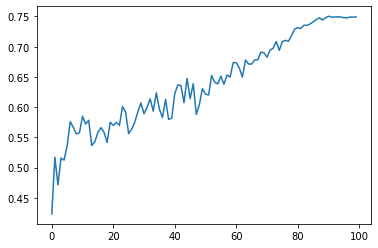

In [4]:
import matplotlib.pyplot as plt
print(best)
plt.plot(history)

In [5]:
agent.optimizer

SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.001
    lr: 0.0007290000000000002
    momentum: 0.9
    nesterov: True
    weight_decay: 0.0005
)